In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df =pd.read_csv("drive/MyDrive/TARP/APY.csv")
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [4]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [5]:
#deleting the NAN value
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(340383, 8)
(4948, 7)


In [6]:
data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [7]:
test.head()

,State,District,Crop,Crop_Year,Season,Area,Yield
11,Andaman and Nicobar Island,NICOBARS,Arecanut,2005,Whole Year,795.67,0.0
270,Andaman and Nicobar Island,SOUTH ANDAMANS,Cowpea(Lobia),2016,Rabi,2.00,0.0
278,Andaman and Nicobar Island,NICOBARS,Dry chillies,2005,Whole Year,17.00,0.0
770,Andhra Pradesh,VIZIANAGARAM,Arecanut,2011,Whole Year,1.00,0.0
833,Andhra Pradesh,ANANTAPUR,Arhar/Tur,2016,Rabi,1.00,0.0


In [8]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

<ipython-input-8-7fccf581cd61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [9]:
data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield,percent_of_production
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40,1.046735e-06
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40,6.979255e-07
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74,9.379236e-07
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64,8.153192e-07
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75,9.563143e-07


data representation

<Axes: xlabel='Crop_Year', ylabel='Production'>

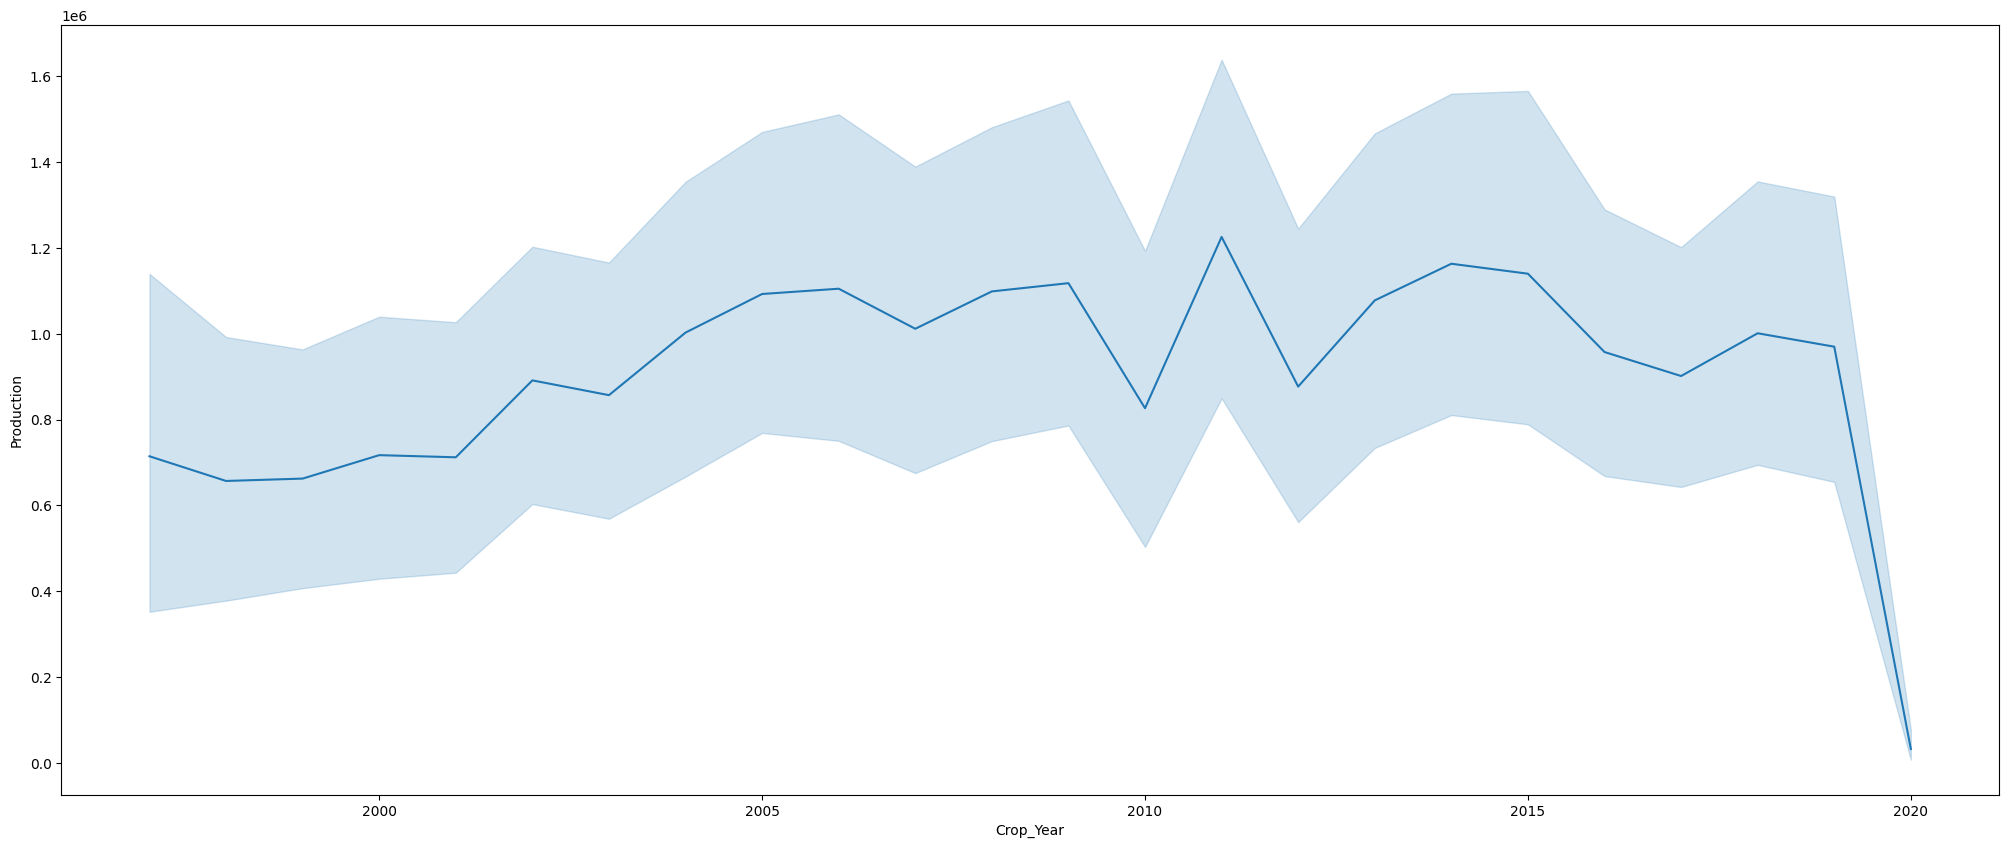

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))
sns.lineplot(x=data["Crop_Year"],y=data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andaman and Nicobar Island'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'CHANDIGARH'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Daman and Diu'),
  Text(9, 0, 'Delhi'),
  Text(10, 0, 'Goa'),
  Text(11, 0, 'Gujarat'),
  Text(12, 0, 'Haryana'),
  Text(13, 0, 'Himachal Pradesh'),
  Text(14, 0, 'Jammu and Kashmir'),
  Text(15, 0, 'Jharkhand'),
  Text(16, 0, 'Karnataka'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Laddak'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),
  Text(27, 0, 'Punjab'),
  Text(28, 0, 'Ra

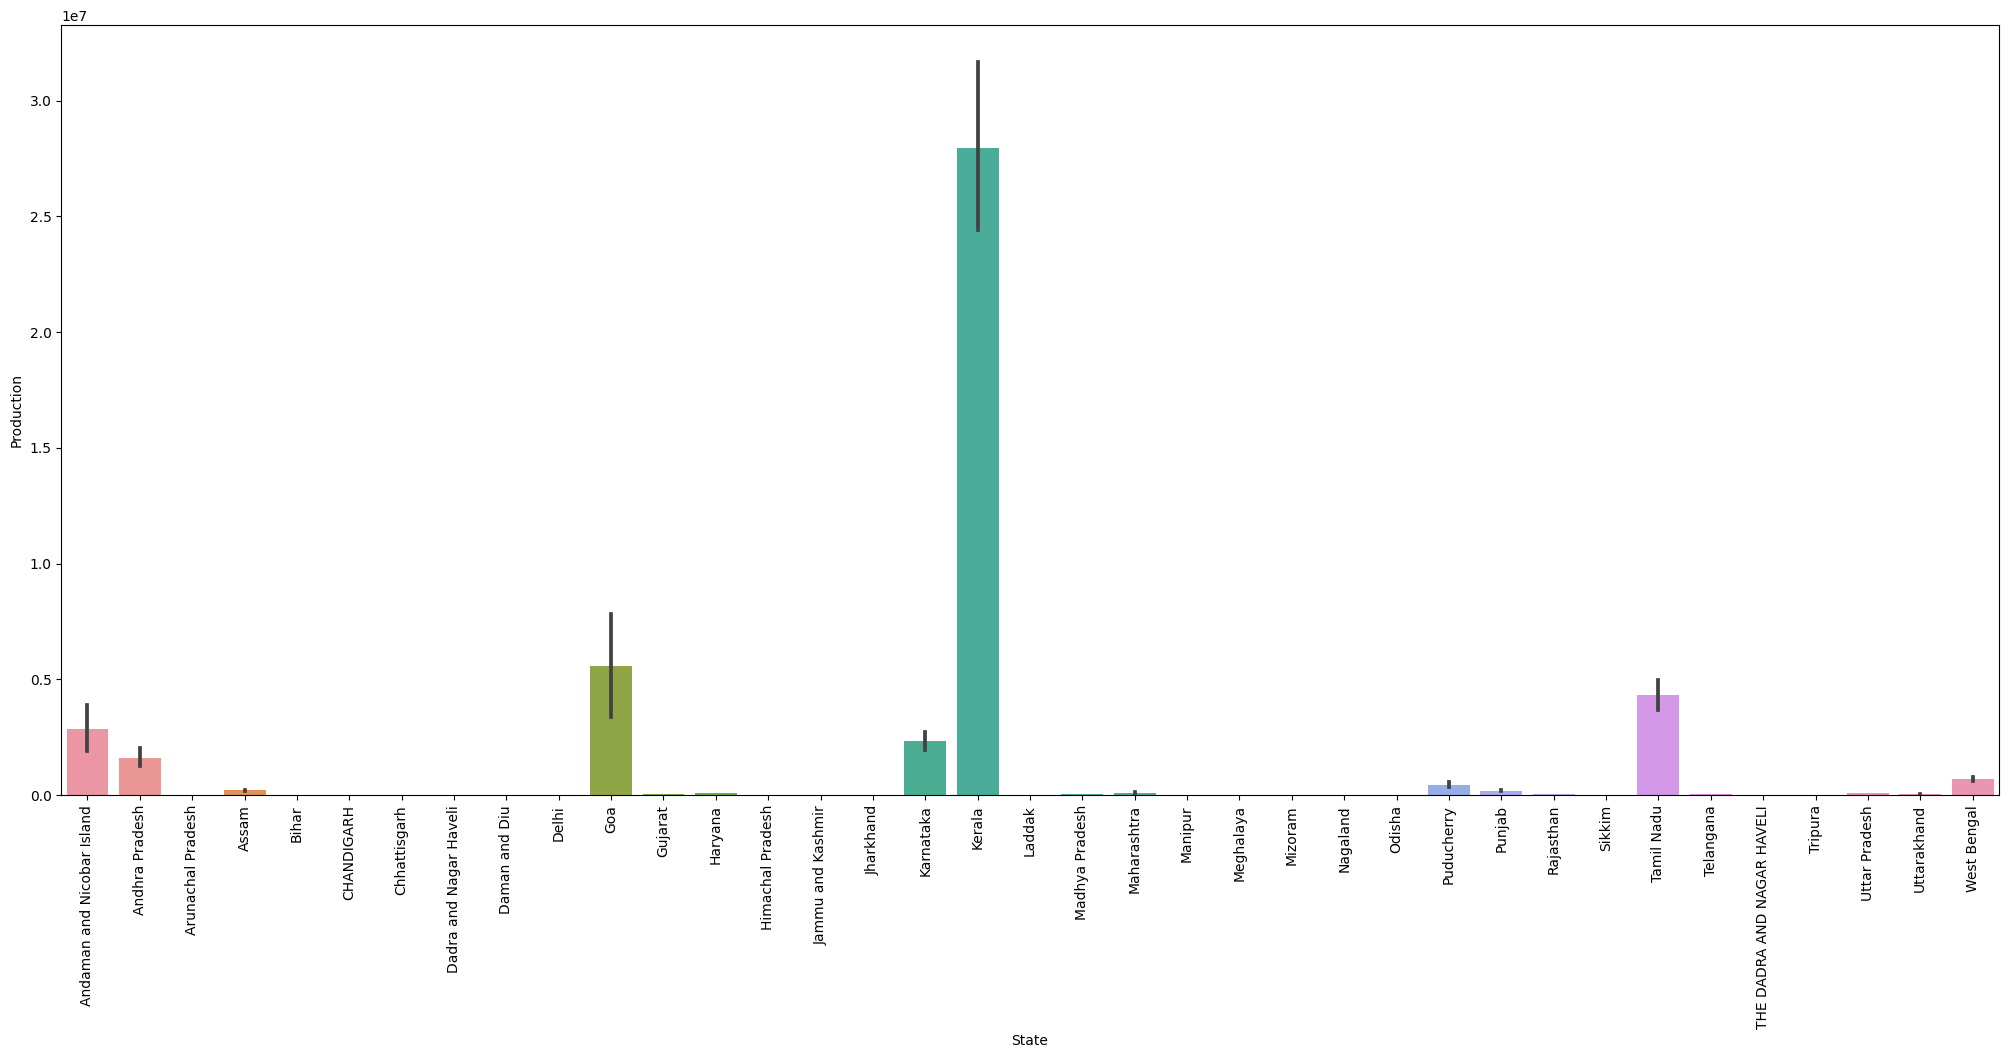

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x=data["State"],y=data["Production"])
plt.xticks(rotation=90)

In [ ]:
# plt.figure(figsize=(25,10))
# sns.jointplot(x=data["Area "],y=data["Production"])

<Axes: xlabel='Season', ylabel='Production'>

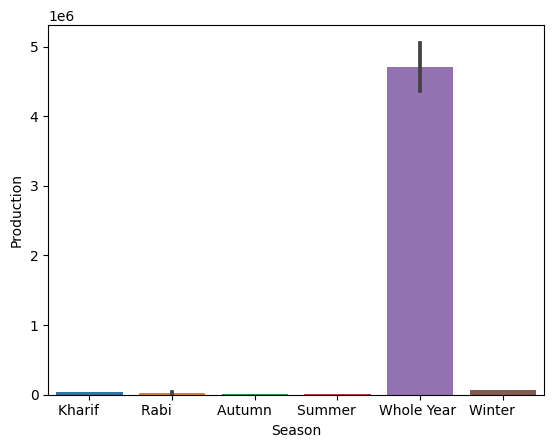

In [ ]:
sns.barplot(x=data["Season"],y=data["Production"])

In [ ]:
import numpy as np
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,8.464151e+07
Kharif,5.622335e+09
Rabi,3.150455e+09
Summer,2.437629e+08
Whole Year,3.165636e+11
Winter,5.877505e+08


In [ ]:
data["Crop"].value_counts()

Rice                     21573
Maize                    20335
Moong(Green Gram)        14851
Urad                     14389
Sesamum                  12744
Groundnut                12515
Wheat                    11208
Rapeseed &Mustard        10919
Sugarcane                10826
Arhar/Tur                10764
Potato                   10729
Onion                    10621
Gram                     10330
Jowar                     9682
Dry chillies              8890
Bajra                     8091
Peas & beans (Pulses)     7179
Sunflower                 7104
Small millets             6859
Cotton(lint)              6318
Masoor                    6296
Barley                    5808
Linseed                   5793
Ragi                      5725
Sweet potato              5656
Other Kharif pulses       5590
Turmeric                  5571
Horse-gram                5294
Garlic                    5202
Coriander                 4954
Soyabean                  4953
Other  Rabi pulses        4728
Castor s

In [ ]:
top_crop = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop[:5]

,Crop,Production
9,Coconut,3.108048e+11
46,Sugarcane,7.249507e+09
40,Rice,2.236428e+09
53,Wheat,2.007360e+09
37,Potato,6.323157e+08


Each type of crops required various area & various season. So lets look at each crop analysis

# COCONUT

In [ ]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df.head()

(2891, 9)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,percent_of_production
207,Andaman and Nicobar Island,NICOBARS,Coconut,2007,Whole Year,21636.0,80640000.0,3727.12,0.024717
208,Andaman and Nicobar Island,NICOBARS,Coconut,2008,Whole Year,43380.0,81900000.0,1887.97,0.025103
209,Andaman and Nicobar Island,NICOBARS,Coconut,2009,Whole Year,43520.0,84970000.0,1952.44,0.026044
210,Andaman and Nicobar Island,NICOBARS,Coconut,2000,Whole Year,18168.0,65100000.0,3583.22,0.019954
211,Andaman and Nicobar Island,NICOBARS,Coconut,2001,Whole Year,18190.0,64430000.0,3542.06,0.019749


<Axes: xlabel='Season', ylabel='Production'>

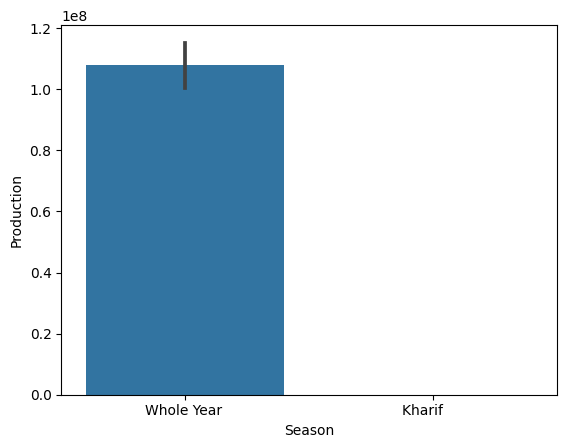

In [ ]:
sns.barplot(x="Season",y="Production",data=coc_df)

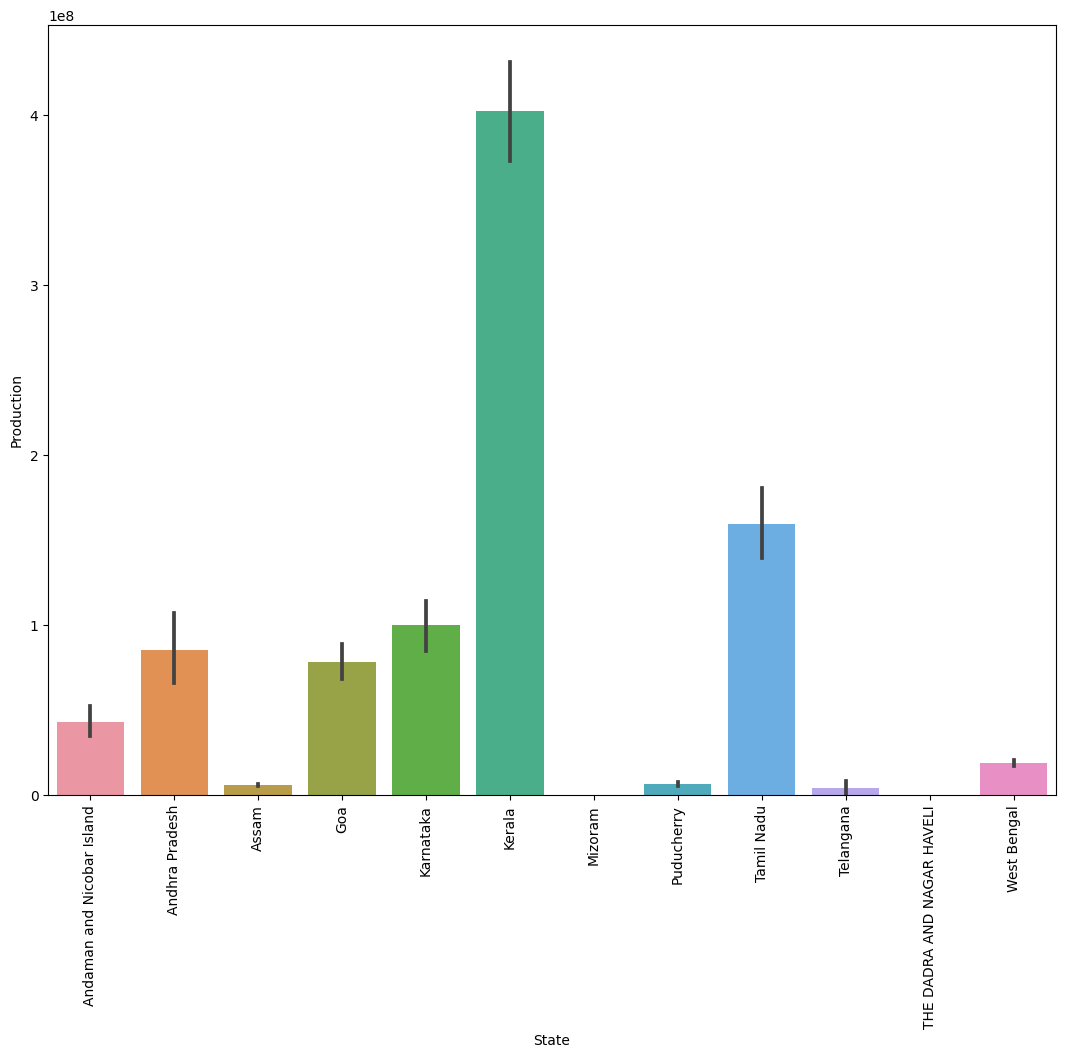

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x="State",y="Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coc_pro_dis = coc_df.groupby("District ")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis.head()

,District,Production,precent_of_pro
148,TUMAKURU,2.075046e+10,6.676363
81,KOZHIKODE,2.036469e+10,6.552246
91,MALAPPURAM,1.961483e+10,6.310982
26,COIMBATORE,1.764180e+10,5.676168
139,THIRUVANANTHAPURAM,1.321177e+10,4.250827


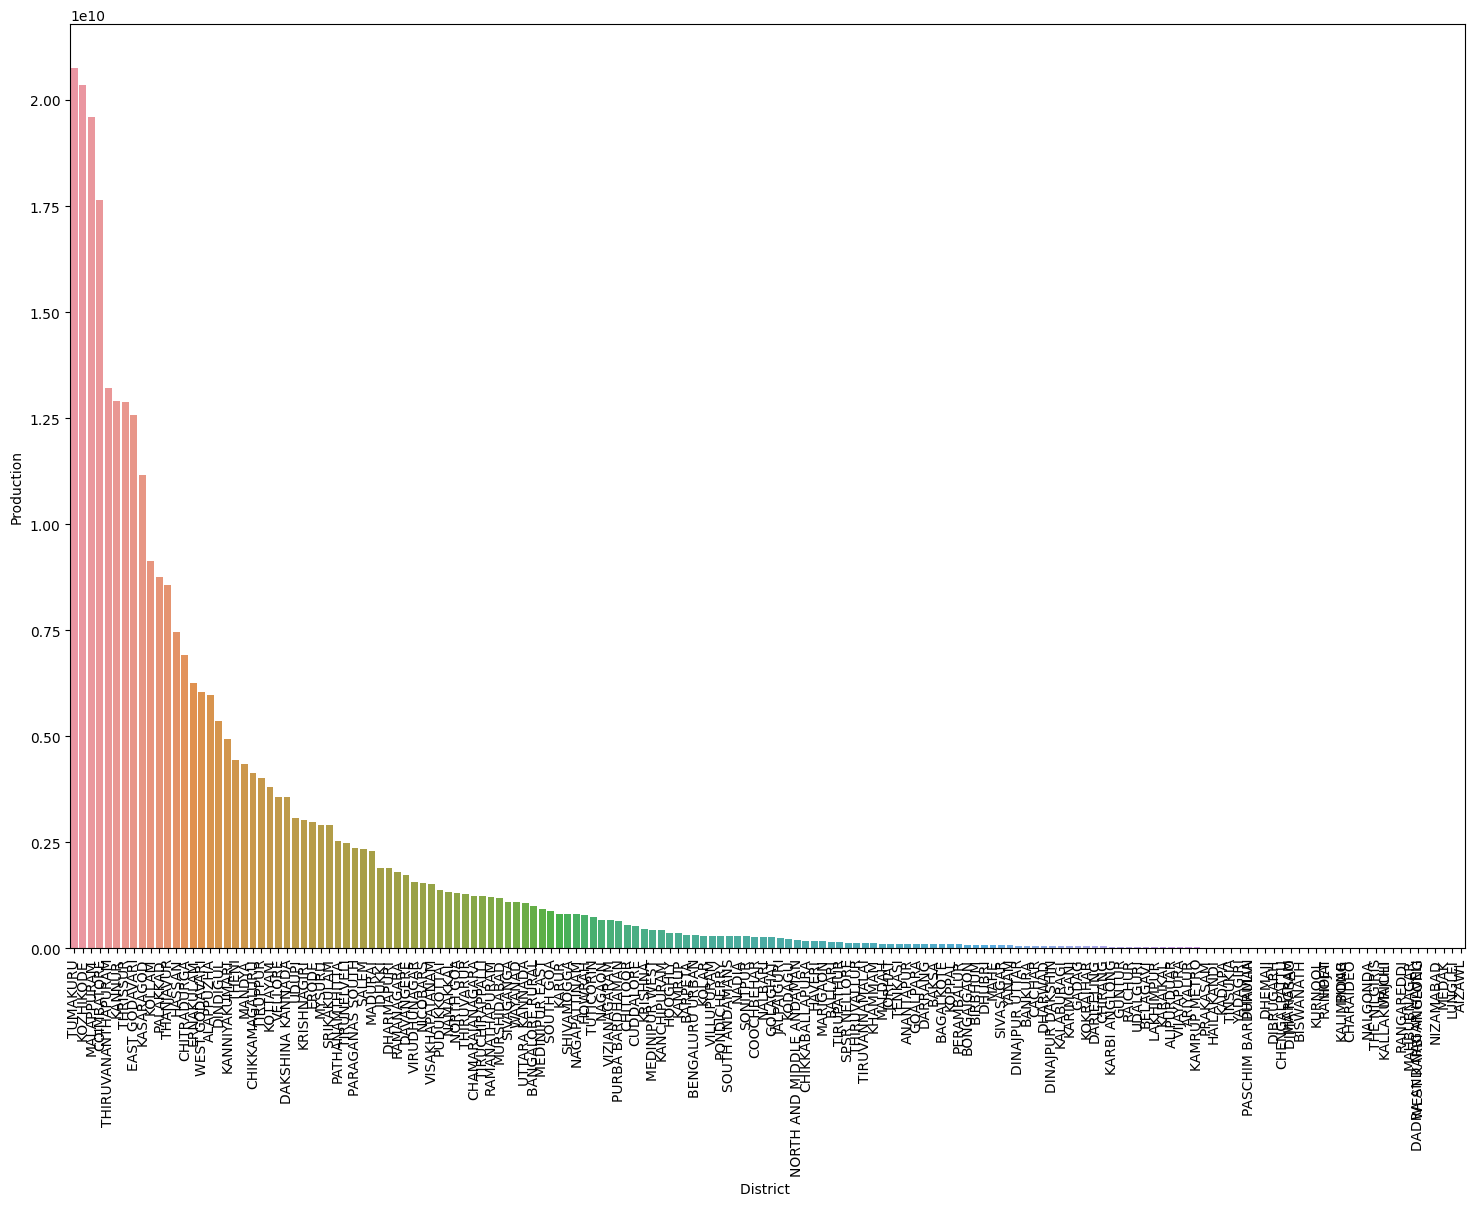

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="District ",y="Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

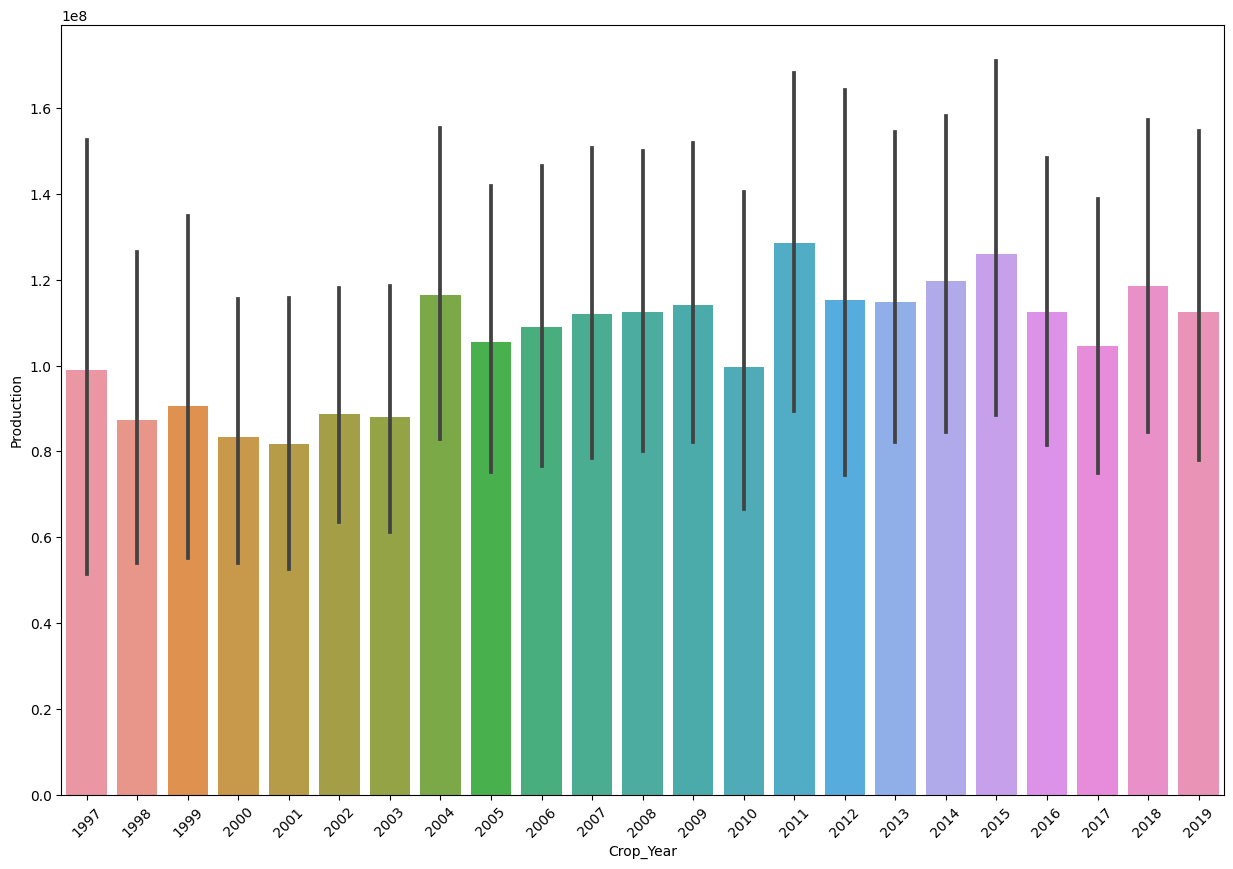

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()


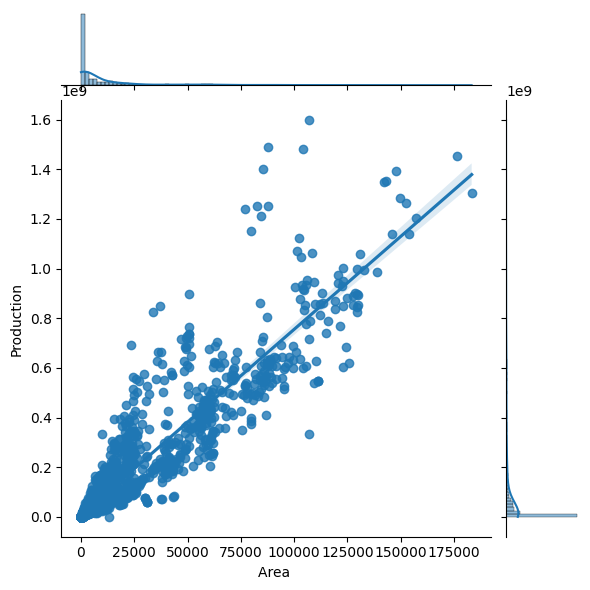

In [ ]:
sns.jointplot(x="Area ",y="Production",data=coc_df,kind="reg")


Insight from Cocunut Production
1. cocunut production is directly proportional to area
2. its production is also gradually increasing over a time of period
3. production is highin kerala state
4. it does not depends on season

## **SUGARCANE**

In [ ]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df.head()

(10826, 9)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,percent_of_production
528,Andaman and Nicobar Island,NICOBARS,Sugarcane,2007,Kharif,106.50,2129.0,19.99,6.525619e-07
529,Andaman and Nicobar Island,NICOBARS,Sugarcane,2007,Rabi,70.93,1419.0,20.01,4.349391e-07
530,Andaman and Nicobar Island,NICOBARS,Sugarcane,2008,Autumn,117.00,2260.0,19.32,6.927148e-07
531,Andaman and Nicobar Island,NICOBARS,Sugarcane,2008,Summer,39.00,760.0,19.49,2.329483e-07
532,Andaman and Nicobar Island,NICOBARS,Sugarcane,2009,Autumn,113.00,1610.0,14.25,4.934827e-07


<Axes: xlabel='Season', ylabel='Production'>

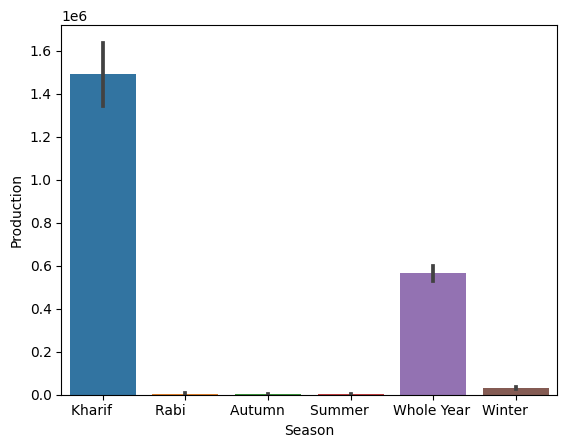

In [ ]:
sns.barplot(x="Season",y="Production",data=sug_df)

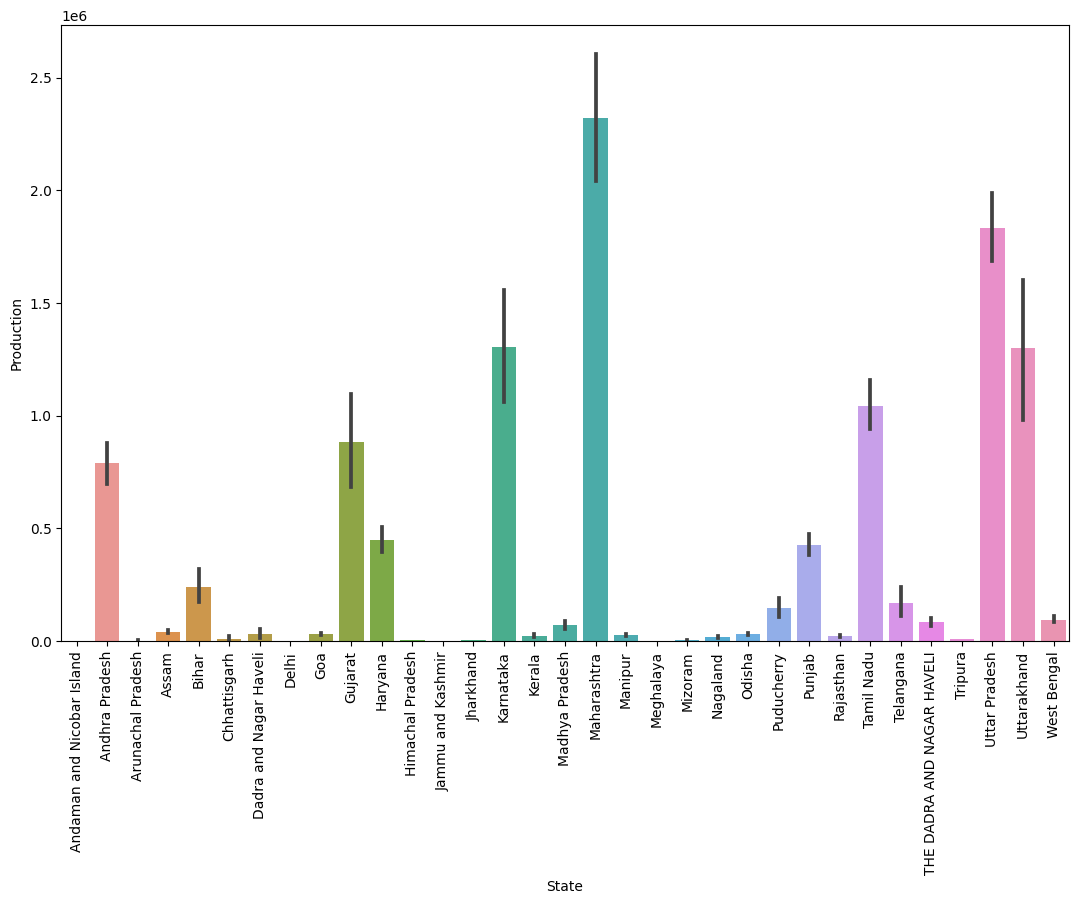

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x="State",y="Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_sug_pro_dis = sug_df.groupby("District ")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis.head()

,District,Production,precent_of_pro
387,MUZAFFARNAGAR,332037252.0,4.580136
300,KHERI,321876259.0,4.439974
81,BIJNOR,312747530.0,4.314052
63,BELAGAVI,280871363.0,3.874351
312,KOLHAPUR,231219168.0,3.189447


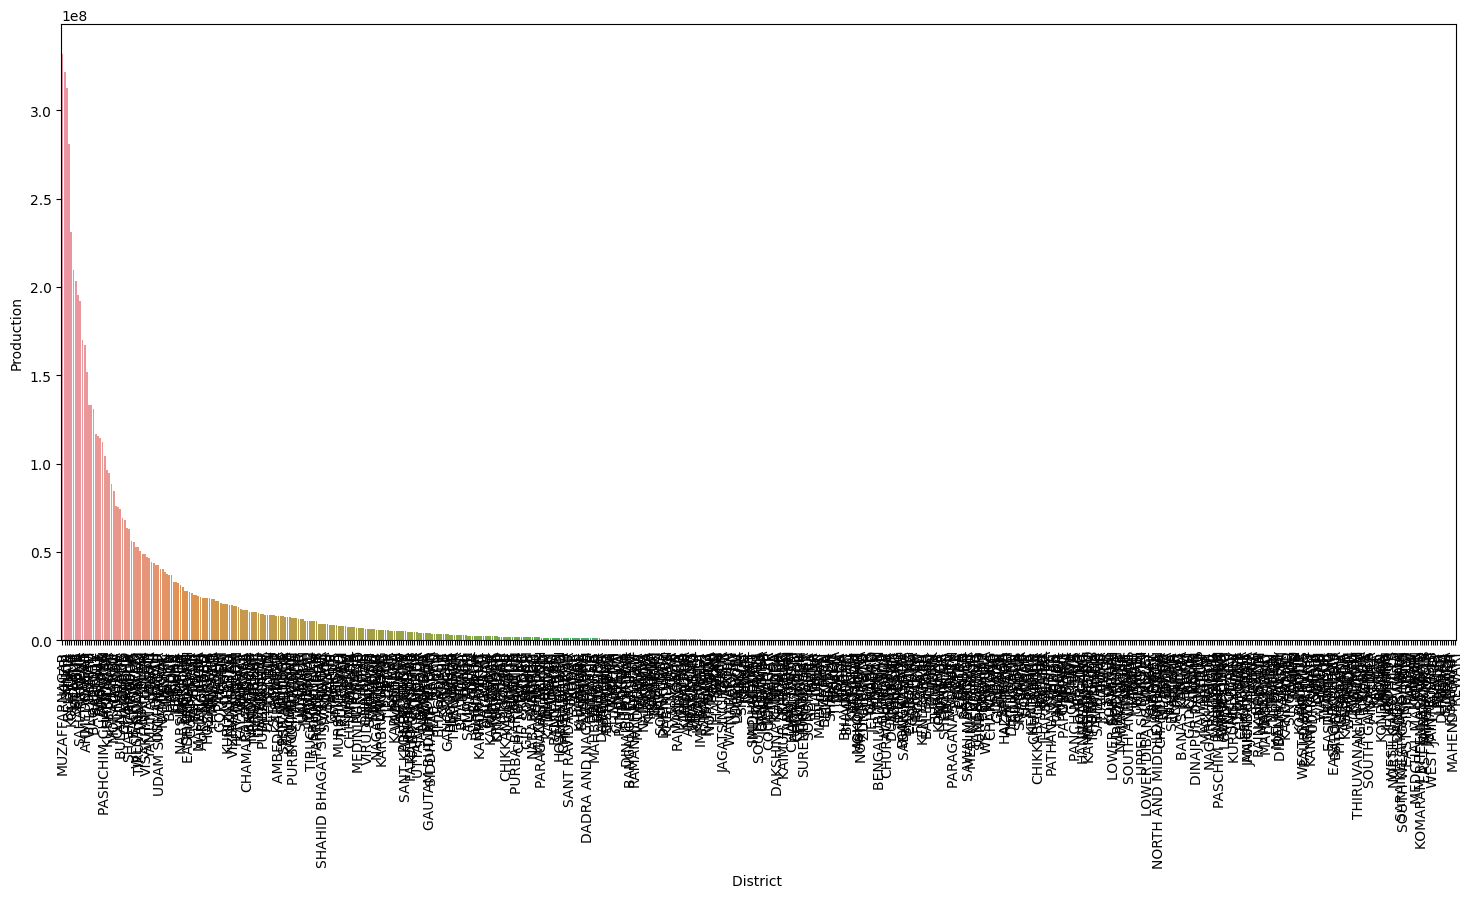

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x="District " ,y="Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

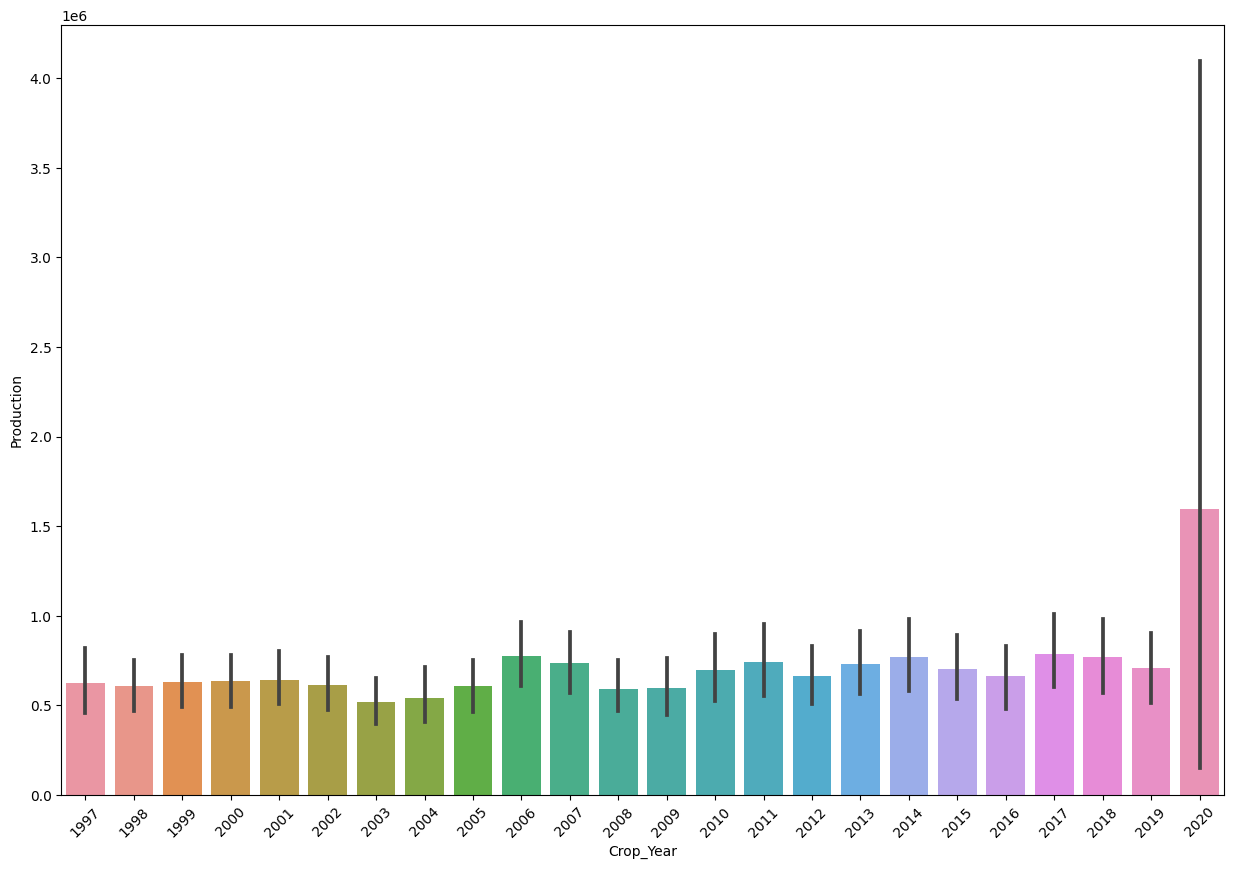

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=sug_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

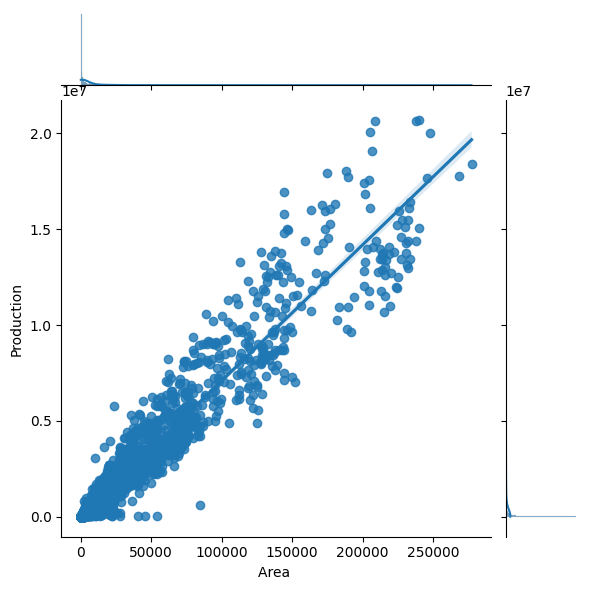

In [ ]:
sns.jointplot(x="Area ",y="Production",data=sug_df,kind="reg")

Insighits:
1. Sugarecane production is directly proportional to area
2. production is highest in Maharashtra.
3. Main season of growth is Kharif

# RICE

In [ ]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df.head()

(21573, 9)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,percent_of_production
468,Andaman and Nicobar Island,NICOBARS,Rice,2007,Kharif,7333.75,21864.0,2.98,6.701556e-06
469,Andaman and Nicobar Island,NICOBARS,Rice,2008,Autumn,7900.00,14730.0,1.86,4.514907e-06
470,Andaman and Nicobar Island,NICOBARS,Rice,2009,Autumn,8140.00,16600.0,2.04,5.088082e-06
471,Andaman and Nicobar Island,NICOBARS,Rice,2000,Kharif,102.00,321.0,3.15,9.839003e-08
472,Andaman and Nicobar Island,NICOBARS,Rice,2001,Kharif,83.00,300.0,3.61,9.195329e-08


<Axes: xlabel='Season', ylabel='Production'>

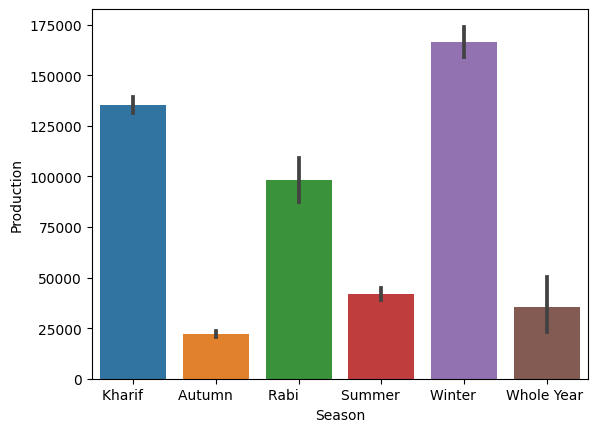

In [ ]:
sns.barplot(x="Season",y="Production",data=rice_df)

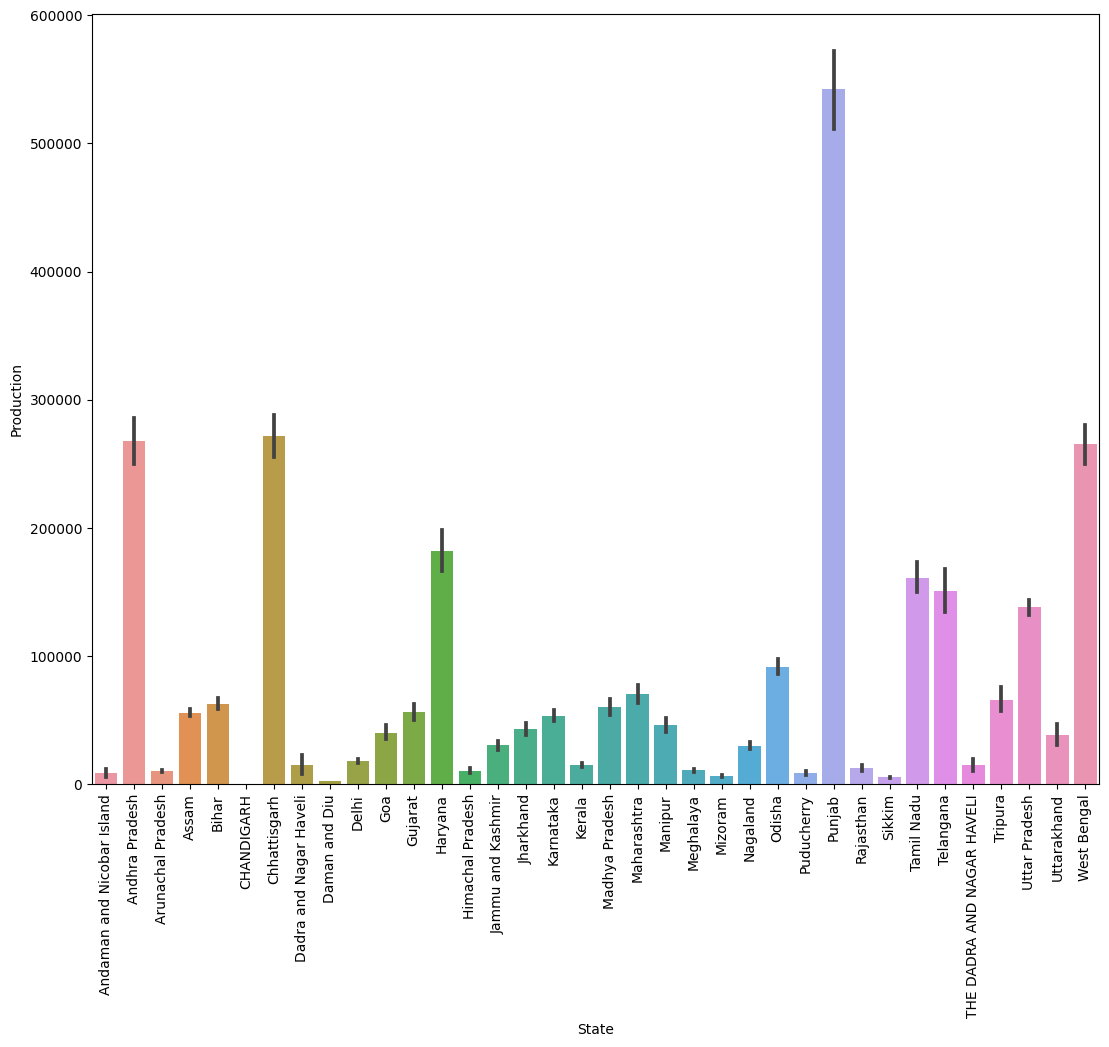

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x="State",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_rice_pro_dis = rice_df.groupby("District ")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis.head()

,District,Production,precent_of_pro
485,PURBA BARDHAMAN,42976070.0,1.921639
399,MEDINIPUR WEST,38585256.0,1.725307
659,WEST GODAVARI,34650471.0,1.549367
533,SANGRUR,31294000.0,1.399285
174,EAST GODAVARI,31229411.0,1.396397


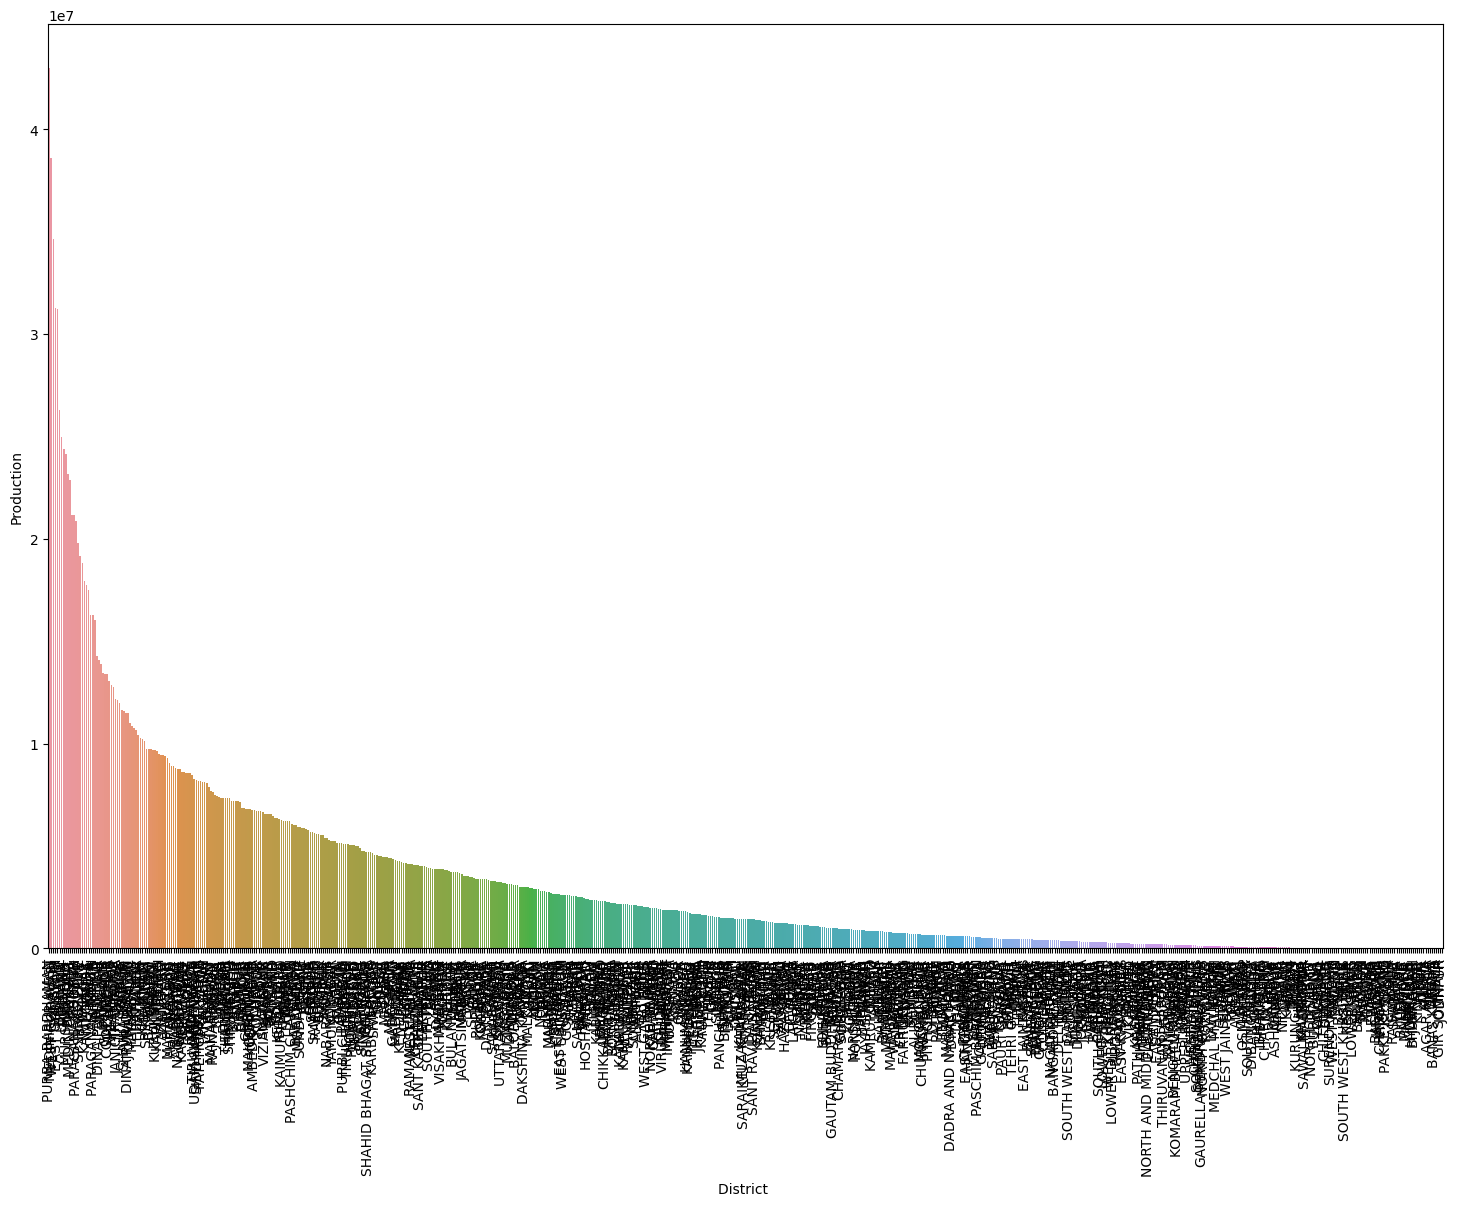

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="District ",y="Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

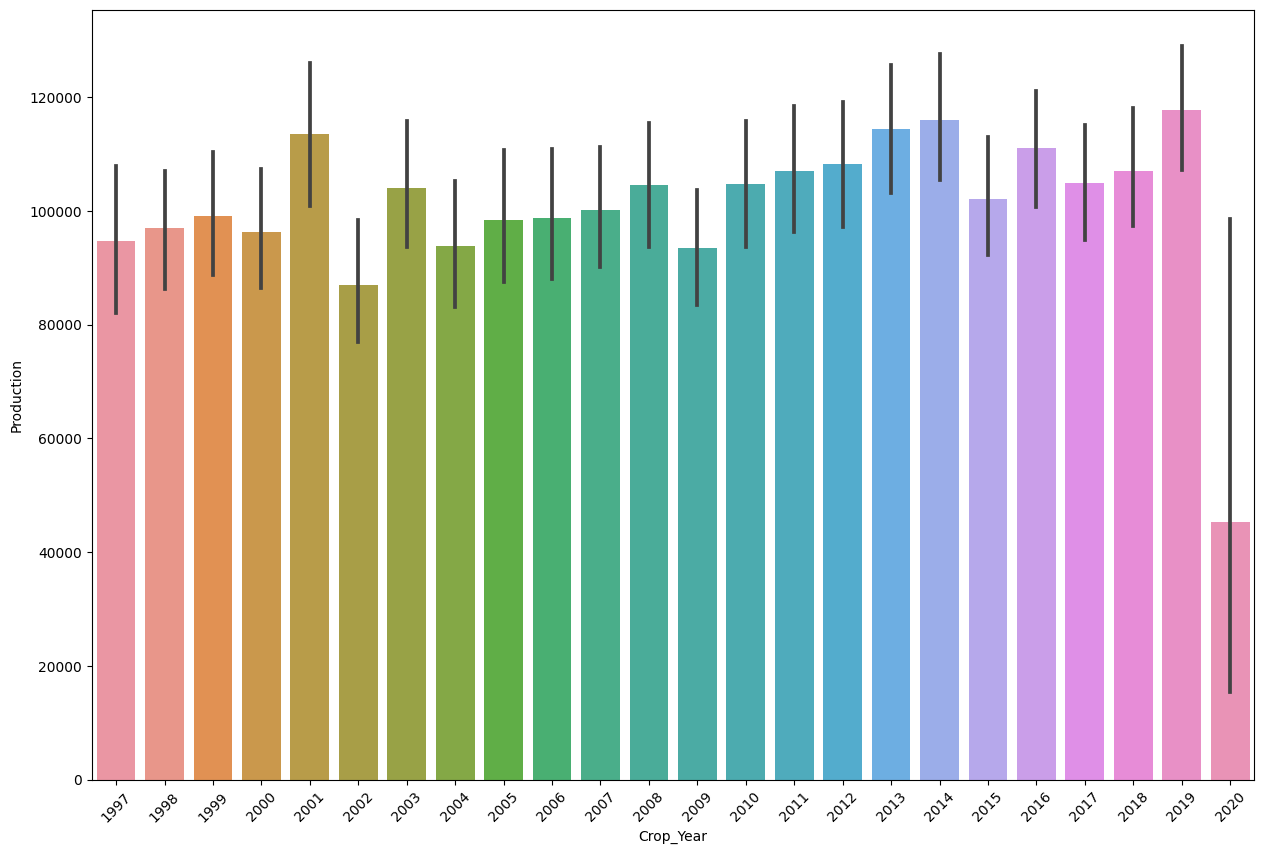

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

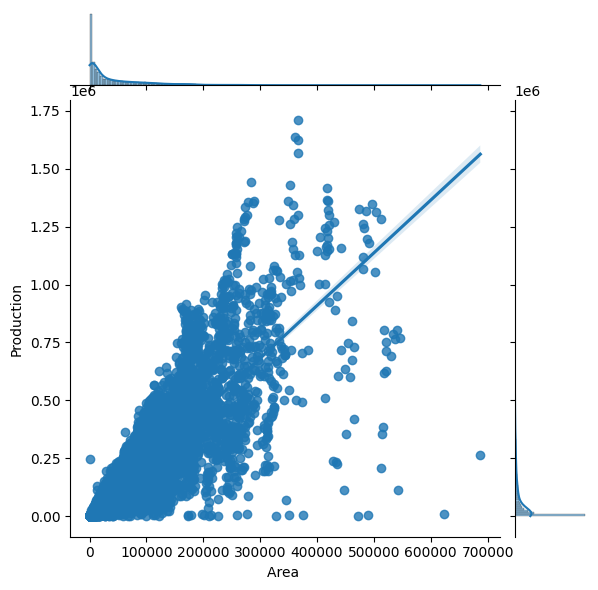

In [ ]:
sns.jointplot(x="Area ",y="Production",data=rice_df,kind="reg")

INSIGHT:
1. Rice production is mostly depends on Season[kharif, rabi and winter being main].
2. As area increases prodction increases
3. Punjab is the major producer




# Feature Selection

In [10]:
data1 = data.drop(["Crop_Year","District "],axis=1)

In [11]:
data_dum = pd.get_dummies(data1)
data_dum.head()

,Area,Production,Yield,percent_of_production,State_Andaman and Nicobar Island,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_CHANDIGARH,...,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,2439.6,3415.0,1.40,1.046735e-06,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1626.4,2277.0,1.40,6.979255e-07,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4147.0,3060.0,0.74,9.379236e-07,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4147.0,2660.0,0.64,8.153192e-07,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4153.0,3120.0,0.75,9.563143e-07,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Test Train Split

In [12]:
from sklearn.model_selection import train_test_split
x = data_dum.drop(columns=["Production"],axis=1)
y = data_dum[["Production"]]

num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, cat_features),
#          ("StandardScaler", numeric_transformer, num_features),        
#     ]
# )

print(num_features)
print(cat_features)

Index(['Area ', 'Yield', 'percent_of_production',
       'State_Andaman and Nicobar Island', 'State_Andhra Pradesh',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_CHANDIGARH', 'State_Chhattisgarh',
       ...
       'Crop_Turmeric', 'Crop_Urad', 'Crop_Wheat', 'Crop_other oilseeds',
       'Season_Autumn     ', 'Season_Kharif     ', 'Season_Rabi       ',
       'Season_Summer     ', 'Season_Whole Year ', 'Season_Winter     '],
      dtype='object', length=101)
Index([], dtype='object')


In [13]:
#x = preprocessor.fit_transform(x)

In [13]:
x.shape

(340383, 101)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (228056, 101)
x_test : (112327, 101)
y_train : (228056, 1)
y_test : (112327, 1)


In [15]:
from sklearn.metrics import r2_score
def evaluate_model(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  r2_square = r2_score(true,predicted)

  return mae,rmse,r2_square




In [16]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import numpy as np

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0002
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 31065.8599
- Mean Absolute Error: 5108.0529
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 30002.4929
- Mean Absolute Error: 5051.6251
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 2183679.8886
- Mean Absolute Error: 268191.8203
- R2 Score: 0.9898
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2164372.5925
- Mean Absolute Error: 265754.0089
- R2 Score: 0.9897


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3210375.5157
- Mean Absolute Error: 82449.7

<ipython-input-18-8930da009a2a>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train) # Train model


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 114748.6717
- Mean Absolute Error: 1746.9045
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 510069.9176
- Mean Absolute Error: 4933.7687
- R2 Score: 0.9994


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 29783.5759
- Mean Absolute Error: 3221.4194
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 422710.8100
- Mean Absolute Error: 9566.4318
- R2 Score: 0.9996


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2896307.1230
- Mean Absolute Error: 115840.0995
- R2 Score: 0.9821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3678855.3609
- Mean Absolute Error: 130039.5109
- R2 Score: 0.9702




/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1609368.7103
- Mean Absolute Error: 986070.6464
- R2 Score: 0.9945
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1708183.8526
- Mean Absolute Error: 987938.0910
- R2 Score: 0.9936




In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
1,Lasso,0.999998
6,XGBRegressor,0.999607
4,Decision Tree,0.999467
5,Random Forest Regressor,0.999427
8,AdaBoost Regressor,0.993575
2,Ridge,0.989685
7,CatBoosting Regressor,0.970198
3,K-Neighbors Regressor,0.954770


# RANDOM FOREST

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(x_train,y_train)
# preds = model.predict(x_test)

In [ ]:
# from sklearn.metrics import r2_score
# r = r2_score(y_test,preds)
# print("R2score when we predict using Randomn forest is ",r)

# Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(x_train,y_train)

In [ ]:
#preds = model.predict(x_test)

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

# XGBRegresor

In [ ]:
# import xgboost as xgb
# xgbr = xgb.XGBRegressor(verbosity=0) 
# xgbr.fit(x_train,y_train)


In [ ]:
# preds = xgbr.predict(x_test)
# mean_squared_error(y_test,preds)
# r2_score(y_test,preds)

# Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# regressor = DecisionTreeRegressor(random_state=42)
# regressor.fit(x_train,y_train)

In [ ]:
# preds = regressor.predict(x_test)

# mean_squared_error(y_test,preds)
# r2_score(y_test,preds)